In [ ]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [ ]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}


In [ ]:
head(df)

X,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_CPI
1,1,2010-02-05,1643691,0,42.31,2.572,211.0964,8.106,NA
2,1,2010-02-12,1641957,1,38.51,2.548,211.2422,8.106,0.06907348
3,1,2010-02-19,1611968,0,39.93,2.514,211.2891,8.106,0.02223661
4,1,2010-02-26,1409728,0,46.63,2.561,211.3196,8.106,0.01443520
5,1,2010-03-05,1554807,0,46.50,2.625,211.3501,8.106,0.01443311
6,1,2010-03-12,1439542,0,57.79,2.667,211.3806,8.106,0.01443103


Estudando o efeito de feriados

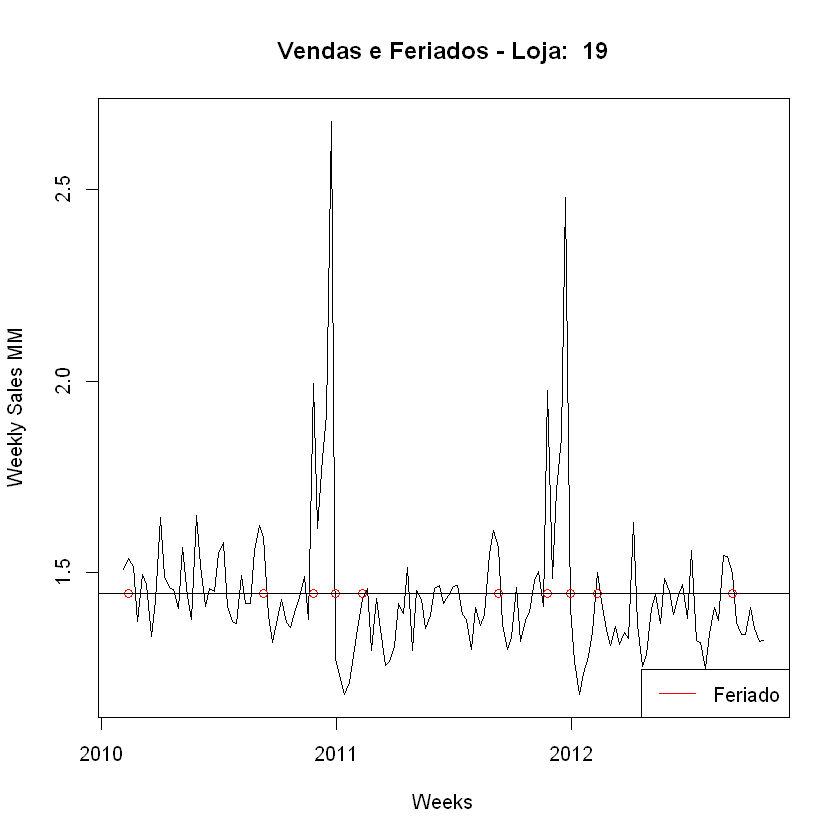

In [ ]:
nstore = 19

dfplot = df[(df$Store == nstore),]
sales_mean = mean(dfplot$Weekly_Sales)/1000000

plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'Weeks',
    main = paste( 'Vendas e Feriados - Loja: ', nstore))
points(dfplot$Date,(dfplot$Holiday_Flag)*sales_mean, col = "red")
abline(h=sales_mean)
legend("bottomright", legend="Feriado", lty=1, col="red", text.col="black")


Estudar semanas no entorno dos feriados. Cuidado no caso Thanks Giving / Natal, com pré e pós se sobrepondo.

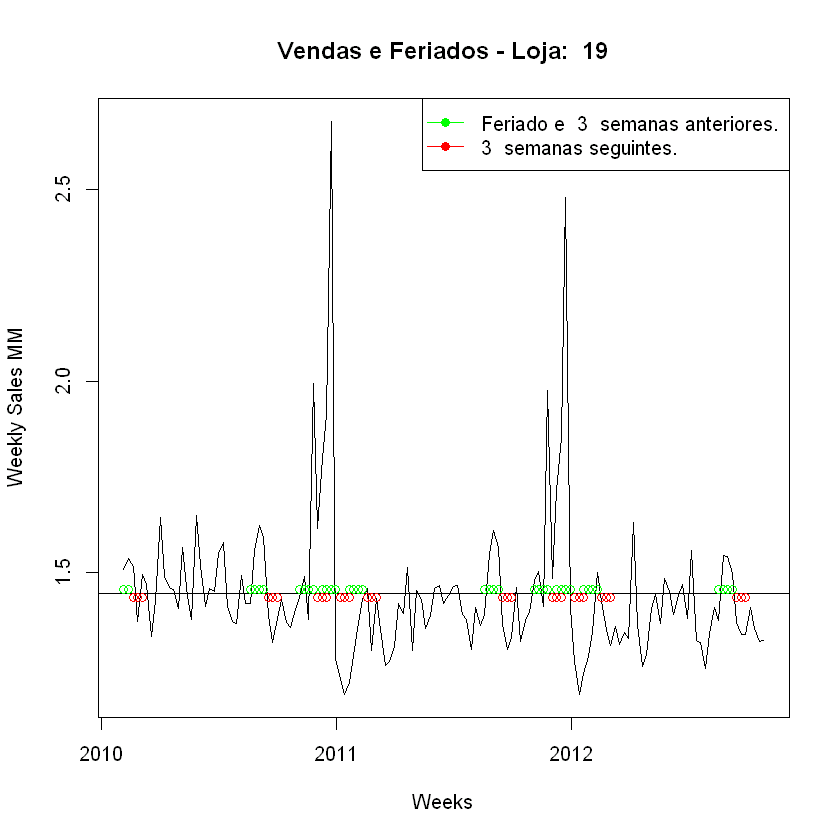

In [ ]:
weeks_pre = 3
weeks_post = 3
condition = dfplot$Holiday_Flag == 1
holiday_dates = dfplot$Date[which(condition)]
nholidays = length(holiday_dates)



##Pre Holiday
dfplot$Pre_Holiday = 0
for (i in 1:nholidays){
    
    match_date = dfplot$Date[which(condition)[i]]

    dfplot$Pre_Holiday = ifelse(dfplot$Date <= match_date & dfplot$Date >= (match_date - weeks_pre*7),1,dfplot$Pre_Holiday)
    
    }

#Post Holiday
dfplot$Post_Holiday = 0
for (i in 1:nholidays){
    
    match_date = dfplot$Date[which(condition)[i]]

    dfplot$Post_Holiday = ifelse(dfplot$Date > match_date & dfplot$Date <= (match_date + weeks_post*7),1,dfplot$Post_Holiday)
    
    }


plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'Weeks',
    main = paste( 'Vendas e Feriados - Loja: ', nstore))
abline(h=sales_mean)
points(dfplot$Date,(dfplot$Pre_Holiday)*sales_mean+0.01, col = "green")
points(dfplot$Date,(dfplot$Post_Holiday)*sales_mean-0.01, col = "red")
legend("topright", legend=c(paste("Feriado e ", weeks_pre, " semanas anteriores."),
                              paste(weeks_post, " semanas seguintes.")), 
                               pch=c(16, 16),
                               lty=1, col=c("green","red"), text.col="black")



Criar boxplot com três grupos, pre (boom), pós (bust) e indiferente (neutral).

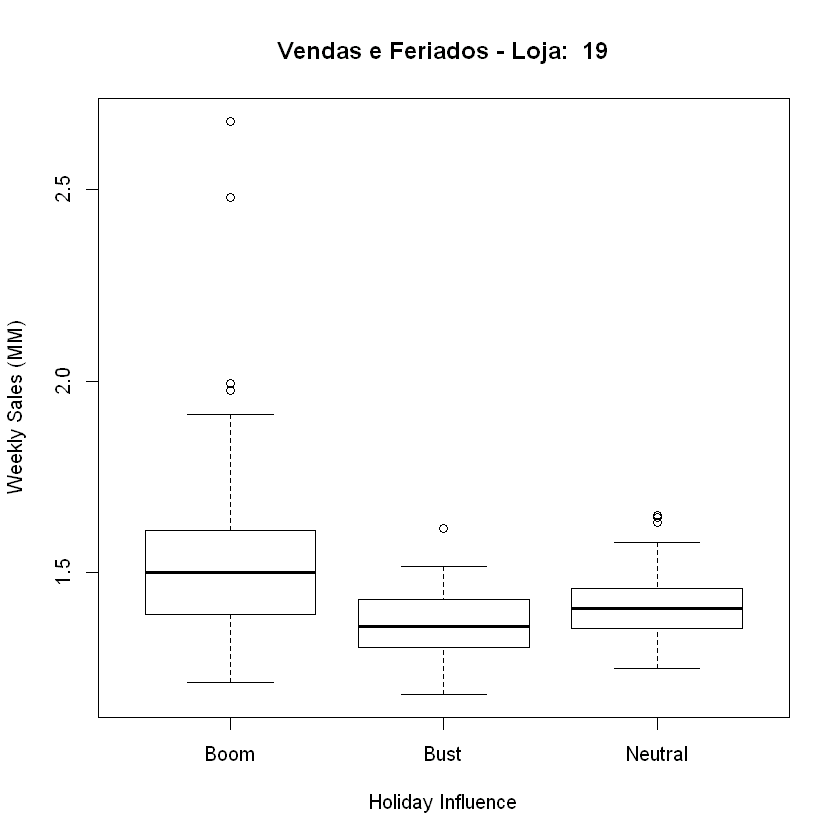

In [ ]:
dfplot$Holiday_Effect = 'Neutral'

dfplot$Holiday_Effect = ifelse(dfplot$Post_Holiday == 1,'Bust', dfplot$Holiday_Effect)
dfplot$Holiday_Effect = ifelse(dfplot$Pre_Holiday == 1,'Boom', dfplot$Holiday_Effect)
bp = boxplot(Weekly_Sales/1000000 ~ Holiday_Effect, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Holiday Influence',
        main = paste( 'Vendas e Feriados - Loja: ', nstore)
       )


Fica clara a influência da aproximação do feriado no aumento de vandas e depois a ressaca de vendas depois do feriado.

In [ ]:
print(bp$stats)

         [,1]     [,2]     [,3]
[1,] 1.212968 1.181205 1.248915
[2,] 1.391793 1.304676 1.355234
[3,] 1.500788 1.359052 1.405066
[4,] 1.609951 1.429145 1.457314
[5,] 1.911967 1.515976 1.577541


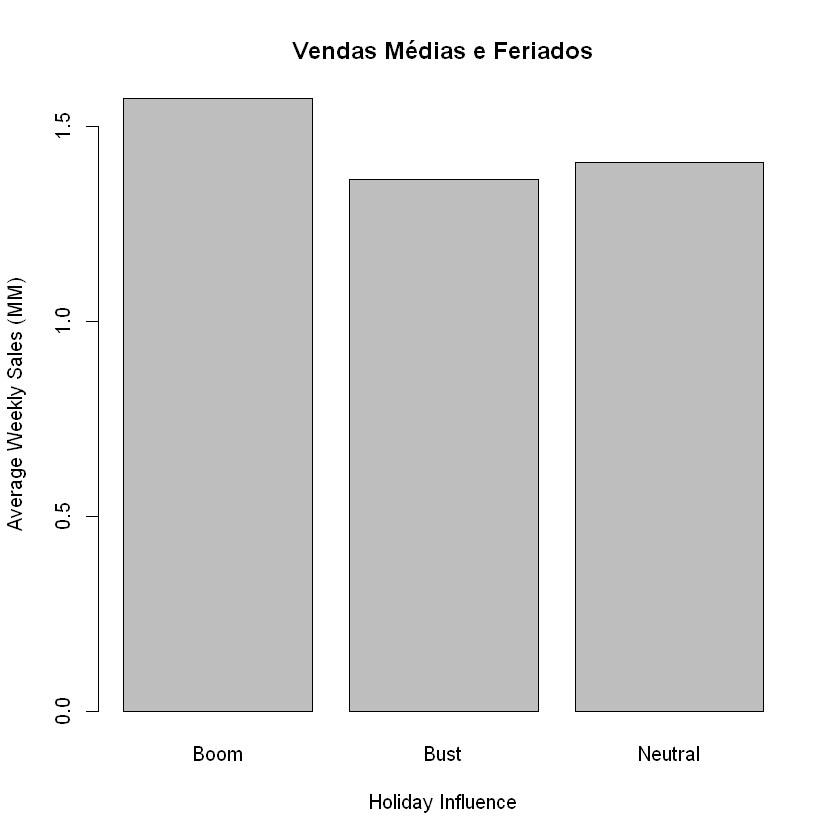

In [ ]:
#REVER PARA MÉDIA

means <- aggregate(Weekly_Sales ~ Holiday_Effect, dfplot, mean)

# Create barplot
barplot(means$Weekly_Sales/1000000, 
        names.arg = sums$Holiday_Effect,
        main = "Vendas Médias e Feriados",
        xlab = "Holiday Influence",
        ylab = " Average Weekly Sales (MM)"
        )